### Lunar Lander Control Problem
##### Solved by Using Reinforcement Learning with Deep Q Network
References:
- https://gymnasium.farama.org/environments/box2d/lunar_lander/
- https://github.com/Bduz/intro_pytorch/tree/main/intro_rl/dqn
# Description
his environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.

### 1 - Importing Necessary Libraries

In [3]:
import sys
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import gym
%pip install gym[box2d] 
import torch
import os
import pygame
from DQN_Agent import DQN_Agent

Note: you may need to restart the kernel to use updated packages.


### 2 - Initialize the Environment and the Agent

In [4]:
env = gym.make('LunarLander-v2',render_mode="rgb_array")    # Create the environment
# env.seed(0)   # Set a random seed for the environment (reproducible results) # Not available in LunarLander
print('State shape: ', env.observation_space.shape) # Get the state and action spaces
print('Number of actions: ', env.action_space.n) # Get the state and action spaces


State shape:  (8,)
Number of actions:  4


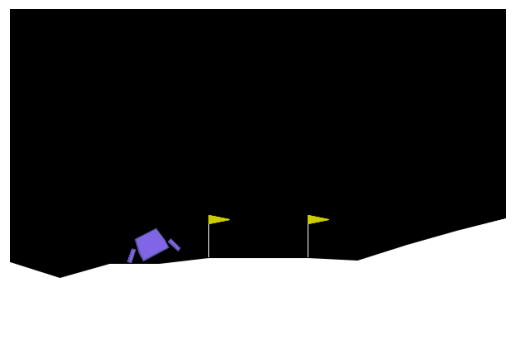

In [7]:
# watch an untrained agent
from DQN_Agent import DQN_Agent

agent = DQN_Agent(state_size=8, action_size=4, seed=0)

state = env.reset()[0]
img = plt.imshow(env.render())
for j in range(500):
    action = agent.act(state)
    img.set_data(env.render())
    plt.axis('off')
    #display(plt.gcf())
    #display(wait=True)
    state, reward, done, _, _ = env.step(action)
    if done:
        break
env.close()


### 3 - Train the Agent with DQN

c:\Users\Adastec-Dolunay\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100	Average Score: -173.39
Episode 200	Average Score: -102.01
Episode 300	Average Score: -79.233
Episode 400	Average Score: -11.67
Episode 500	Average Score: 58.850
Episode 600	Average Score: 152.62
Episode 700	Average Score: 138.73
Episode 778	Average Score: 201.89
Environment solved in 678 episodes!	Average Score: 201.89


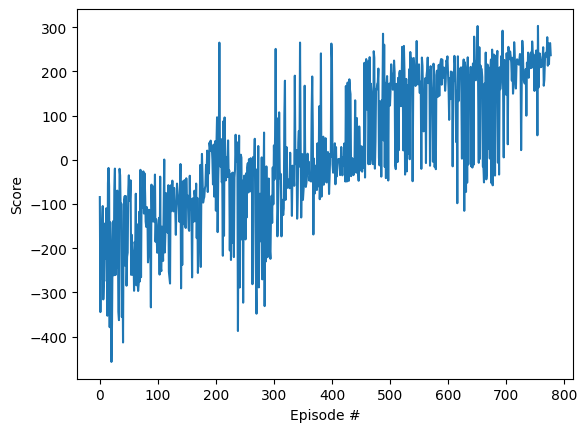

In [12]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    env = gym.make('LunarLander-v2')
    #env.seed(0)
    env.reset()[0]
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
